Paradigm entropy
================

This notebook shows some conditional entropy calculations from Ackerman & Malouf (in press).  The Pite Saami data is taken from:

> Wilbur, Joshua (2014). *A Grammar of Pite Saami.* Berlin: Langauge Science Press. [http://langsci-press.org/catalog/book/17]

In [1]:
%precision 3

import numpy as np
import pandas as pd
pd.set_option('display.float_format',lambda x : '%.3f'%x)

In [2]:
import entropy

Read in the paradigms from tab-delimited file as a pandas DataFrame:

In [3]:
saami = pd.read_table('saami.txt', index_col=0)
saami

,nom.sg,gen.sg,acc.sg,ill.sg,iness.sg,elat.sg,com.sg,nom.pl,gen.pl,acc.pl,ill.pl,iness.pl,elat.pl,com.pl
class,,,,,,,,,,,,,,
Ia,str+a,wk+a,wk+av,str+aj,wk+an,wk+ast,wk+ajn,wk+a,wk+aj,wk+ajd,wk+ajda,wk+ajn,wk+ajst,wk+aj
Ib,str+á,wk+á,wk+áv,str+áj,wk+án,wk+ást,wk+ájn,wk+á,wk+áj,wk+ájd,wk+ájda,wk+ájn,wk+ájst,wk+áj
Ic,str+o,wk+o,wk+ov,str+oj,wk+on,wk+ost,wk+ojn,wk+o,wk+oj,wk+ojd,wk+ojda,wk+ojn,wk+ojst,wk+oj
Id,str+å,wk+å,wk+åv,str+åj,wk+ån,wk+åst,wk+åjn,wk+å,wk+åj,wk+åjd,wk+åjda,wk+åjn,wk+åjst,wk+åj
Ie,str+e,wk+e,wk+ev,str+áj,wk+en,wk+est,wk+ijn,wk+e,wk+ij,wk+ijd,wk+ijda,wk+ijn,wk+ijst,wk+ij
II,wk+aj,str+a,str+av,str+aj,str+an,str+ast,str+ajn,str+a,str+aj,str+ajd,str+ajda,str+ajn,str+ajst,str+aj
IIIa,wk+0,str+a,str+av,str+ij,str+in,str+ist,str+ijn,str+a,str+ij,str+ijd,str+ijda,str+ijn,str+ijst,str+ij
IIIb,wk+V,str+a,str+av,str+ij,str+in,str+ist,str+ijn,str+a,str+ij,str+ijd,str+ijda,str+ijn,str+ijst,str+ij


In [4]:
sing = [c for c in saami.columns if c.endswith('sg')]
plur = [c for c in saami.columns if c.endswith('pl')]
print saami[sing].to_latex()
print saami[plur].to_latex()

\begin{tabular}{llllllll}
\toprule
{} & nom.sg & gen.sg &  acc.sg &  ill.sg & iness.sg &  elat.sg &   com.sg \\
\midrule
class &        &        &         &         &          &          &          \\
Ia    &  str+a &   wk+a &   wk+av &  str+aj &    wk+an &   wk+ast &   wk+ajn \\
Ib    &  str+á &   wk+á &   wk+áv &  str+áj &    wk+án &   wk+ást &   wk+ájn \\
Ic    &  str+o &   wk+o &   wk+ov &  str+oj &    wk+on &   wk+ost &   wk+ojn \\
Id    &  str+å &   wk+å &   wk+åv &  str+åj &    wk+ån &   wk+åst &   wk+åjn \\
Ie    &  str+e &   wk+e &   wk+ev &  str+áj &    wk+en &   wk+est &   wk+ijn \\
II    &  wk+aj &  str+a &  str+av &  str+aj &   str+an &  str+ast &  str+ajn \\
IIIa  &   wk+0 &  str+a &  str+av &  str+ij &   str+in &  str+ist &  str+ijn \\
IIIb  &   wk+V &  str+a &  str+av &  str+ij &   str+in &  str+ist &  str+ijn \\
\bottomrule
\end{tabular}

\begin{tabular}{llllllll}
\toprule
{} & nom.pl &  gen.pl &   acc.pl &    ill.pl & iness.pl &   elat.pl &  com.pl \\
\midrule
class &

1.pl and 2.pl are the cells with the largest number of distinct realizations and the augmentatives are the cells with the least:

In [5]:
saami.describe()

,nom.sg,gen.sg,acc.sg,ill.sg,iness.sg,elat.sg,com.sg,nom.pl,gen.pl,acc.pl,ill.pl,iness.pl,elat.pl,com.pl
count,8,8,8,8,8,8,8,8,8,8,8,8,8,8
unique,8,6,6,5,7,7,7,6,7,7,7,7,7,7
top,str+å,str+a,str+av,str+aj,str+in,str+ist,str+ijn,str+a,str+ij,str+ijd,str+ijda,str+ijn,str+ijst,str+ij
freq,1,3,3,2,2,2,2,3,2,2,2,2,2,2


Total number of distinct realizations:

In [6]:
len(set(saami.values.flatten()))

70

If $D$ is the set of declensions for a particular paradigm, the probability (assuming all declensions are equally likely) of an arbitrary lexeme belonging to a particular paradigm $d$ is

$$P(d)=\frac{1}{|D|}$$

Since there are eight distinct classes, the probability of any lexeme belonging to any one class would be $\frac{1}{8}$. We could represent a lexeme's declension as a choice among eight equally likely alternatives, which thus has an entropy of $-\log_2 8=3$ bits. This is the **declension entropy** $H(D)$, the average information required to record the inflection class membership of a lexeme:

In [7]:
np.log2(len(saami.index))

3.000

Let $D_{c=r}$ be the set of declensions for which the paradigm cell $c$ has the formal realization $r$.  Then the probability $P_{c}(r)$ of a paradigm cell $c$ of a particular lexeme having the realization $r$ is the probability of that lexeme belonging to one of the declensions in $D_{c=r}$,  or:

$$P_{c}(r)=\sum_{d\in D_{c=r}}P(d)$$

The entropy of this distribution is the **paradigm cell entropy** $H(c)$, the uncertainty in the realization for a paradigm cell $c$:

In [8]:
H = pd.DataFrame([entropy.entropy(saami)], index=['H'])
H

,nom.sg,gen.sg,acc.sg,ill.sg,iness.sg,elat.sg,com.sg,nom.pl,gen.pl,acc.pl,ill.pl,iness.pl,elat.pl,com.pl
H,3.000,2.406,2.406,2.250,2.750,2.750,2.750,2.406,2.750,2.750,2.750,2.750,2.750,2.750


In [9]:
print H[sing].to_latex()
print H[plur].to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  nom.sg &  gen.sg &  acc.sg &  ill.sg &  iness.sg &  elat.sg &  com.sg \\
\midrule
H &   3.000 &   2.406 &   2.406 &   2.250 &     2.750 &    2.750 &   2.750 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
{} &  nom.pl &  gen.pl &  acc.pl &  ill.pl &  iness.pl &  elat.pl &  com.pl \\
\midrule
H &   2.406 &   2.750 &   2.750 &   2.750 &     2.750 &    2.750 &   2.750 \\
\bottomrule
\end{tabular}



The average cell entropy is a measure of how difficult it is for a speaker to guess the realization of any one wordform of any particular lexeme in the absence of any information about that lexeme's declension:

In [10]:
print entropy.entropy(saami).mean()
print 2**entropy.entropy(saami).mean()

2.65835122762
6.31311148211


Above we defined $P_{c}(r)$, the probability that paradigm cell $c$ of a lexeme has the realization $r$.  We can easily generalize that to the joint probability of two cells $c_1$ and $c_2$ having the realizations $r_1$ and $r_2$ respectively:

$$P_{c_1,c_2}(r_1,r_2)=\sum_{d\in D_{c_1=r_1 \wedge c_2=r_2}}P(d)$$

To quantify paradigm cell inter-predictability in terms of conditional entropy, we can define the conditional probability of a realization given another realization of a cell in the same lexeme's paradigm:

$$P_{c_1}(r_1|c_2=r_2)=\frac{P_{c_1,c_2}(r_1,r_2)}{P_{c_2}(r_2)}$$

With this background, the conditional entropy $H(c_1|c_2)$ of a cell $c_1$ given knowledge of the realization of $c_2$ for a particular lexeme is:

$$H(c_1|c_2)=\sum_{r_1}\sum_{r_2}P_{c_1}(r_1)\,P_{c_2}(r_2)\log_2 P_{c_1}(r_1|c_2=r_2)$$


In [11]:
H = entropy.cond_entropy(saami)
H

,nom.sg,gen.sg,acc.sg,ill.sg,iness.sg,elat.sg,com.sg,nom.pl,gen.pl,acc.pl,ill.pl,iness.pl,elat.pl,com.pl
nom.sg,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
gen.sg,0.594,NaN,0.000,0.344,0.344,0.344,0.344,0.000,0.344,0.344,0.344,0.344,0.344,0.344
acc.sg,0.594,0.000,NaN,0.344,0.344,0.344,0.344,0.000,0.344,0.344,0.344,0.344,0.344,0.344
ill.sg,0.750,0.500,0.500,NaN,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
iness.sg,0.250,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
elat.sg,0.250,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
com.sg,0.250,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000
nom.pl,0.594,0.000,0.000,0.344,0.344,0.344,0.344,NaN,0.344,0.344,0.344,0.344,0.344,0.344
gen.pl,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000
acc.pl,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000


The column averages measure *predictedness*, how hard it is to guess the realization of a cell given some other cell:

In [12]:
pd.DataFrame([H.mean(0)], index=['AVG'])

,nom.sg,gen.sg,acc.sg,ill.sg,iness.sg,elat.sg,com.sg,nom.pl,gen.pl,acc.pl,ill.pl,iness.pl,elat.pl,com.pl
AVG,0.368,0.038,0.038,0.079,0.118,0.118,0.118,0.038,0.118,0.118,0.118,0.118,0.118,0.118


In [13]:
print pd.DataFrame([H.mean(0)],index=['AVG'])[sing].to_latex()
print pd.DataFrame([H.mean(0)],index=['AVG'])[plur].to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  nom.sg &  gen.sg &  acc.sg &  ill.sg &  iness.sg &  elat.sg &  com.sg \\
\midrule
AVG &   0.368 &   0.038 &   0.038 &   0.079 &     0.118 &    0.118 &   0.118 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
{} &  nom.pl &  gen.pl &  acc.pl &  ill.pl &  iness.pl &  elat.pl &  com.pl \\
\midrule
AVG &   0.038 &   0.118 &   0.118 &   0.118 &     0.118 &    0.118 &   0.118 \\
\bottomrule
\end{tabular}



And the row averages measures *predictiveness*, how hard it is to guess the realization of some other cell given this cell:

In [14]:
pd.DataFrame([H.mean(1)], index=['AVG'])

,nom.sg,gen.sg,acc.sg,ill.sg,iness.sg,elat.sg,com.sg,nom.pl,gen.pl,acc.pl,ill.pl,iness.pl,elat.pl,com.pl
AVG,0.000,0.311,0.311,0.519,0.019,0.019,0.019,0.311,0.019,0.019,0.019,0.019,0.019,0.019


In [15]:
print pd.DataFrame([H.mean(1)],index=['AVG'])[sing].to_latex()
print pd.DataFrame([H.mean(1)],index=['AVG'])[plur].to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  nom.sg &  gen.sg &  acc.sg &  ill.sg &  iness.sg &  elat.sg &  com.sg \\
\midrule
AVG &   0.000 &   0.311 &   0.311 &   0.519 &     0.019 &    0.019 &   0.019 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
{} &  nom.pl &  gen.pl &  acc.pl &  ill.pl &  iness.pl &  elat.pl &  com.pl \\
\midrule
AVG &   0.311 &   0.019 &   0.019 &   0.019 &     0.019 &    0.019 &   0.019 \\
\bottomrule
\end{tabular}



Add row and column averages to the table:

In [16]:
H = H.join(pd.Series(H.mean(1), name='AVG'))
H = H.append(pd.Series(H.mean(0), name='AVG'))
H

,nom.sg,gen.sg,acc.sg,ill.sg,iness.sg,elat.sg,com.sg,nom.pl,gen.pl,acc.pl,ill.pl,iness.pl,elat.pl,com.pl,AVG
nom.sg,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
gen.sg,0.594,NaN,0.000,0.344,0.344,0.344,0.344,0.000,0.344,0.344,0.344,0.344,0.344,0.344,0.311
acc.sg,0.594,0.000,NaN,0.344,0.344,0.344,0.344,0.000,0.344,0.344,0.344,0.344,0.344,0.344,0.311
ill.sg,0.750,0.500,0.500,NaN,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.519
iness.sg,0.250,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019
elat.sg,0.250,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019
com.sg,0.250,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019
nom.pl,0.594,0.000,0.000,0.344,0.344,0.344,0.344,NaN,0.344,0.344,0.344,0.344,0.344,0.344,0.311
gen.pl,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.019
acc.pl,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.019


And format the result in $\LaTeX$

In [17]:
print H[sing].to_latex(na_rep='---')
print H[plur].to_latex(na_rep='---')

\begin{tabular}{llllllll}
\toprule
{} & nom.sg & gen.sg & acc.sg & ill.sg & iness.sg & elat.sg & com.sg \\
\midrule
nom.sg   &    --- &  0.000 &  0.000 &  0.000 &    0.000 &   0.000 &  0.000 \\
gen.sg   &  0.594 &    --- &  0.000 &  0.344 &    0.344 &   0.344 &  0.344 \\
acc.sg   &  0.594 &  0.000 &    --- &  0.344 &    0.344 &   0.344 &  0.344 \\
ill.sg   &  0.750 &  0.500 &  0.500 &    --- &    0.500 &   0.500 &  0.500 \\
iness.sg &  0.250 &  0.000 &  0.000 &  0.000 &      --- &   0.000 &  0.000 \\
elat.sg  &  0.250 &  0.000 &  0.000 &  0.000 &    0.000 &     --- &  0.000 \\
com.sg   &  0.250 &  0.000 &  0.000 &  0.000 &    0.000 &   0.000 &    --- \\
nom.pl   &  0.594 &  0.000 &  0.000 &  0.344 &    0.344 &   0.344 &  0.344 \\
gen.pl   &  0.250 &  0.000 &  0.000 &  0.000 &    0.000 &   0.000 &  0.000 \\
acc.pl   &  0.250 &  0.000 &  0.000 &  0.000 &    0.000 &   0.000 &  0.000 \\
ill.pl   &  0.250 &  0.000 &  0.000 &  0.000 &    0.000 &   0.000 &  0.000 \\
iness.pl &  0.250 &  0.000

---

Next we try a simple bootstrap simulation to test the importance of implicational relations in the paradigm. 

Statistical hypothesis testing proceeds by identifying a statistic whose sampling distribution is known under the null hypothesis $H_0$, and then estimating the  probability of finding a result which deviates from what would be expected under $H_0$ at least as much as the observed data does. In this case,  $H_0$ is that implicational relations are not a factor in reducing average conditional entropy in Saami, and the relevant statistic is the average conditional entropy.  Unfortunately, we have no theoretical basis for deriving the sampling distribution of average conditional entropy under $H_0$, which precludes the use of conventional statistical methods. However, we can use a simple computational procedure for estimating the sampling distribution of the average conditional entropy.  Take Saami$'$, an alternate version of Saami with formal realizations assigned randomly to paradigm cells. More specifically, we generate  Saami$'$ by constructing 4 random conjugations, where each conjugation is produced by randomly selecting for each of the paradigm cells one of the possible realizations of that cell.  The result is a language with more or less the same same number of declensions, paradigm cells, and allomorphs as genuine Saami, but with no implicational structure.

In [26]:
boot = entropy.bootstrap(saami, 999)

Averaged across 999 simulation runs (plus the original), the average average conditional entropy is notably higher than the true average conditional entropy of 0.116 bits:

In [27]:
boot.mean()

0.758

In [28]:
len(boot),boot.min()

(1000, 0.116)

Across the distribution of simulated Saami$'$s, the real Saami is an outlier: only 0.01% of the sample have an average conditional entropy as low or lower than that of real Saami:

In [29]:
sum(boot <= boot[0]) / 1000.

0.001

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']= '8, 6'

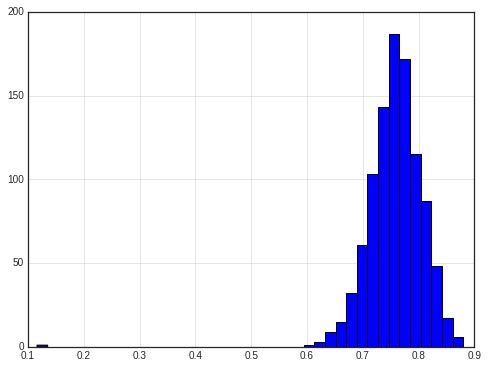

In [31]:
plot = boot.hist(bins=40)